In [ ]:
import pickle

#inpiclle the files
with open(r'/content/images.p',"rb") as f:
  images=pickle.load(f)

with open(r'/content/labels.p',"rb") as f:
  labels=pickle.load(f)


In [ ]:
print(images.shape)  #737 ip is there and each ip is of 100x100 matrix size
print(labels.shape)  #each ip have one label . So there are 737 labels

(737, 100, 100)
(737,)


In [ ]:
set(labels)

{'Sanket',
 'akanksha',
 'banty',
 'bedaprakash',
 'mahesh',
 'pratyasha',
 'sai',
 'soham'}

In [ ]:
from sklearn.preprocessing import LabelEncoder   # import the label encoder
le=LabelEncoder()
labels=le.fit_transform(labels)

In [ ]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [ ]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7])

array(['Sanket', 'akanksha', 'banty', 'bedaprakash', 'mahesh',
       'pratyasha', 'sai', 'soham'], dtype='<U11')

In [ ]:
import numpy as np

In [ ]:
n_persons=len(set(labels))
print("Number of persons: ",n_persons)
label_mapping=le.inverse_transform(np.arange(n_persons))

for i in range(len(label_mapping)):
  print(i,"-->",label_mapping[i])


Number of persons:  8
0 --> Sanket
1 --> akanksha
2 --> banty
3 --> bedaprakash
4 --> mahesh
5 --> pratyasha
6 --> sai
7 --> soham


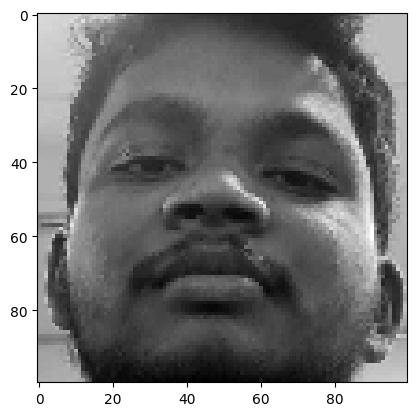

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images[100], cmap=plt.get_cmap("gray"))
plt.show()

In [ ]:
import cv2

In [ ]:
def preprocessing(img):
  img=cv2.equalizeHist(img)
  img=img.reshape(100,100,1)
  img=img/225
  return img

In [ ]:
images=np.array(list(map(preprocessing,images)))
print("Shape of Input: ",images.shape)


Shape of Input:  (737, 100, 100, 1)


In [ ]:
print(images)

[[[[1.10666667]
   [1.08444444]
   [1.08444444]
   ...
   [1.04      ]
   [1.04888889]
   [1.04      ]]

  [[1.10666667]
   [1.08888889]
   [1.08444444]
   ...
   [1.04      ]
   [1.04888889]
   [1.04      ]]

  [[1.09777778]
   [1.09777778]
   [1.09777778]
   ...
   [1.04      ]
   [1.05333333]
   [1.04      ]]

  ...

  [[0.15111111]
   [0.10222222]
   [0.08888889]
   ...
   [0.22666667]
   [0.28444444]
   [0.28444444]]

  [[0.15111111]
   [0.11555556]
   [0.09333333]
   ...
   [0.23111111]
   [0.27111111]
   [0.32444444]]

  [[0.16444444]
   [0.13777778]
   [0.10666667]
   ...
   [0.25333333]
   [0.27111111]
   [0.29777778]]]


 [[[1.08888889]
   [1.04444444]
   [1.07111111]
   ...
   [1.01777778]
   [1.01777778]
   [1.01777778]]

  [[1.13333333]
   [1.10666667]
   [1.04888889]
   ...
   [1.01777778]
   [1.01777778]
   [1.01777778]]

  [[1.11111111]
   [1.07111111]
   [1.11111111]
   ...
   [1.01333333]
   [1.01777778]
   [1.01777778]]

  ...

  [[0.4       ]
   [0.28888889]
   [0.2

In [ ]:

from tensorflow.keras.utils import to_categorical

In [ ]:
labels=to_categorical(labels)

In [ ]:
categories=labels.shape[1]
print(categories)

8


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# import convolution layer
from tensorflow.keras.layers import Conv2D
# import pooling layer
from tensorflow.keras.layers import MaxPooling2D
# import faltten layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop


In [ ]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(64, (5,5), input_shape=(100, 100, 1), activation="relu"))
  model.add(Conv2D(64, (5,5), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32, (3,3), activation="relu"))
  model.add(Conv2D(32, (3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(512, activation="relu"))
  model.add(Dense(8,activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [ ]:
model=modified_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 64)        1664      
                                                                 
 conv2d_5 (Conv2D)           (None, 92, 92, 64)        102464    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 32)        18464     
                                                                 
 conv2d_7 (Conv2D)           (None, 42, 42, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                  

In [ ]:
history = model.fit(images,labels, validation_split=0.1,epochs = 10, batch_size = 200, verbose = 1)

Epoch 1/10
4/4 [==============================] - 3s 214ms/step - loss: 2.0811 - accuracy: 0.1629 - val_loss: 3.6717 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 1s 162ms/step - loss: 1.3961 - accuracy: 0.5867 - val_loss: 2.4991 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 1s 150ms/step - loss: 0.3373 - accuracy: 0.8869 - val_loss: 0.4787 - val_accuracy: 0.9324
Epoch 4/10
4/4 [==============================] - 1s 167ms/step - loss: 0.0804 - accuracy: 0.9774 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 1s 159ms/step - loss: 0.0339 - accuracy: 0.9925 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 1s 156ms/step - loss: 0.0255 - accuracy: 0.9940 - val_loss: 0.0409 - val_accuracy: 0.9865
Epoch 7/10
4/4 [==============================] - 1s 168ms/step - loss: 0.0109 - accuracy: 0.9985 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 8/10
4

Text(0.5, 0, 'epoch')

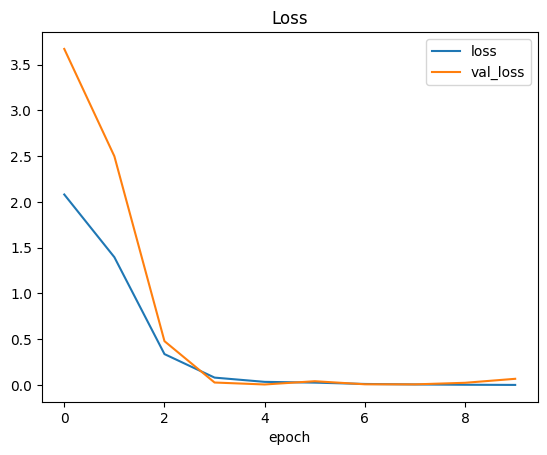

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

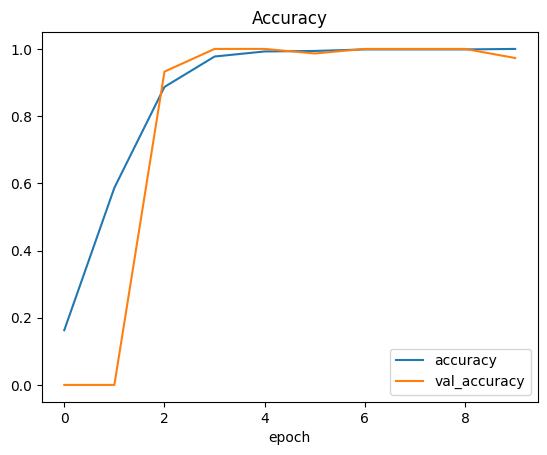

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
from google.colab import files
upload=files.upload()


Saving sai_22.jpg to sai_22.jpg


In [ ]:
d=list(upload.keys())[0]
print(d)

sai_22.jpg


[255 216 255 ... 127 255 217]


<ipython-input-67-6cc6288e281e>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


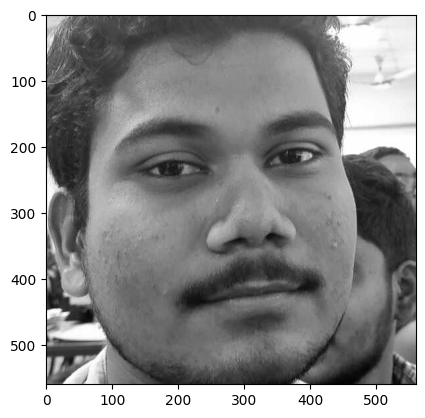

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)

In [ ]:
img=img.reshape(1,100,100,1)
print(model.predict(img))

1/1 [==============================] - 0s 81ms/step
[[4.3065711e-11 4.3180118e-15 3.5585689e-13 1.4745661e-09 4.1487437e-15
  1.8491271e-07 9.9999976e-01 2.6279298e-10]]


In [ ]:
prediction=model.predict(img)

1/1 [==============================] - 0s 19ms/step


In [ ]:
p=np.argmax(prediction,axis=1)
p

array([6])

In [ ]:
model.save("final_model.h5")  #h5--> commands to save model